# Clustering des Clients du Centre Commercial
Ce notebook vise à segmenter les clients en groupes homogènes à partir de leurs caractéristiques.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Chargement des données
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Suppression de l'identifiant inutile
df = df.drop(columns=['CustomerID'])
# Encodage de la variable 'Gender'
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
# Standardisation des variables quantitatives
scaler = StandardScaler()
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaled_data = scaler.fit_transform(df[features])

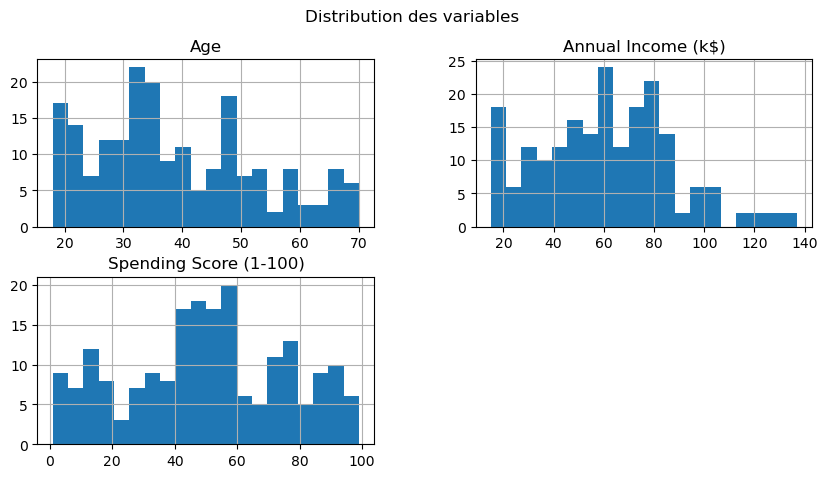

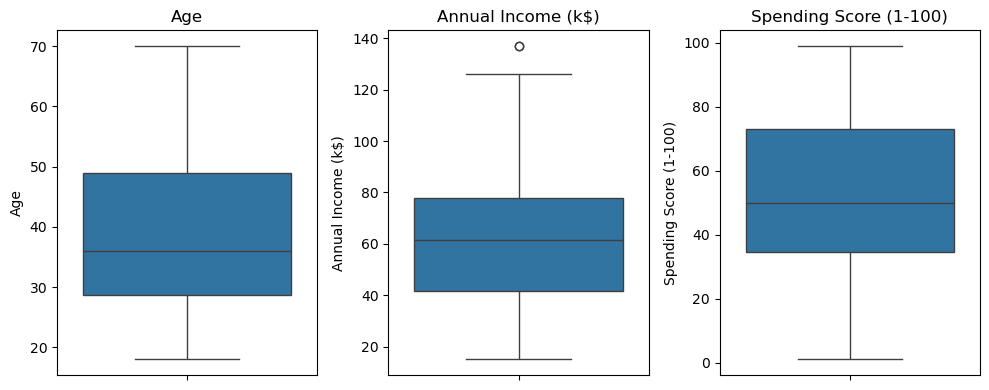

In [4]:
# Histogrammes
df[features].hist(bins=20, figsize=(10, 5))
plt.suptitle('Distribution des variables')
plt.show()

# Boxplots
plt.figure(figsize=(10, 4))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

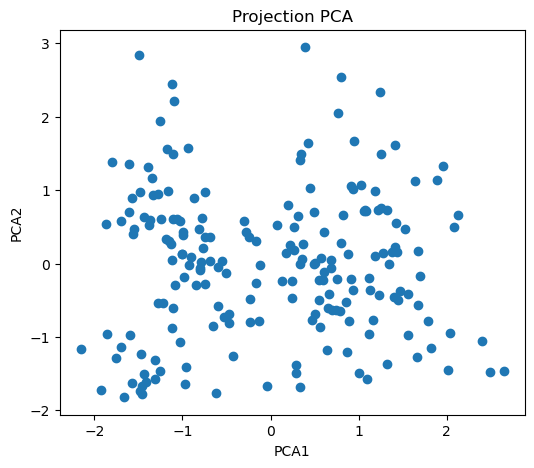

In [5]:
# Réduction de dimension par PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(6, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('Projection PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

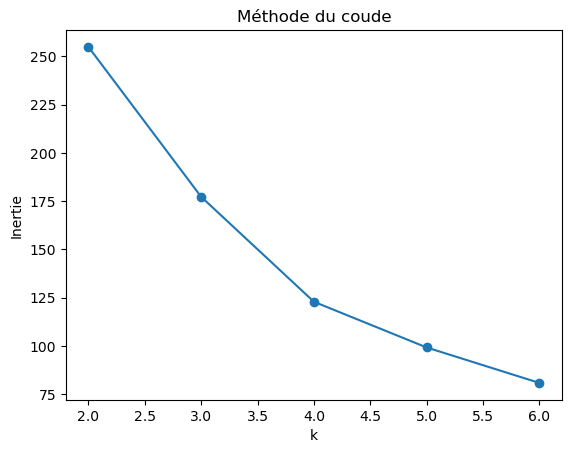

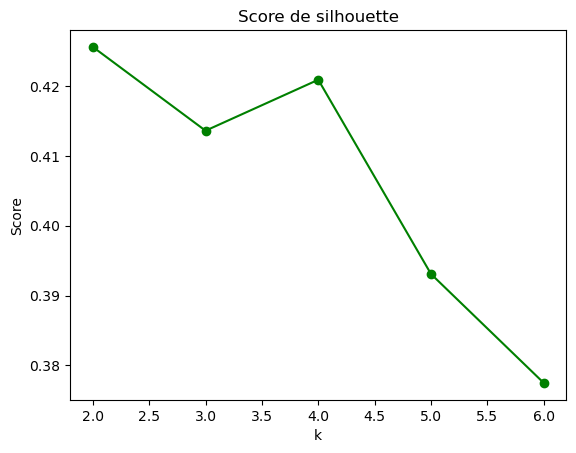

In [6]:
# K-means de k=2 à 6
inertia = []
silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

# Méthode du coude
plt.plot(range(2, 7), inertia, marker='o')
plt.title('Méthode du coude')
plt.xlabel('k')
plt.ylabel('Inertie')
plt.show()

# Silhouette
plt.plot(range(2, 7), silhouette_scores, marker='o', color='green')
plt.title('Score de silhouette')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


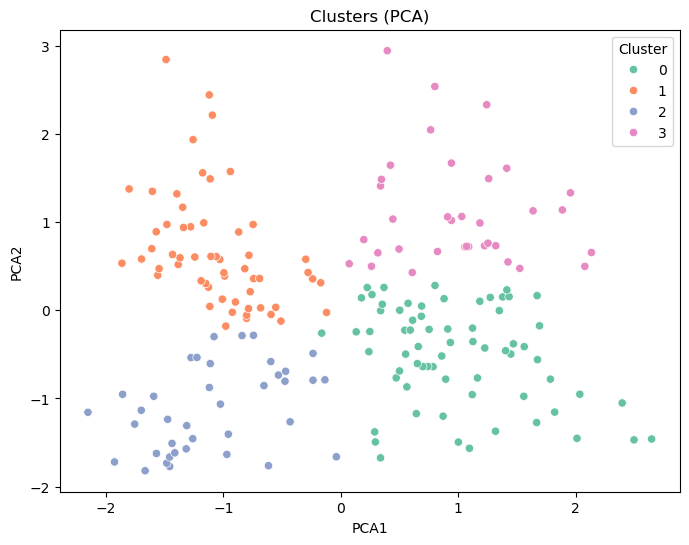

In [7]:
# Clustering final avec k=4
k_opt = 4
final_kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
clusters = final_kmeans.fit_predict(pca_data)
df['Cluster'] = clusters
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

# Visualisation finale
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Clusters (PCA)')
plt.show()

## Conclusion

Grâce au clustering K-means et à la réduction dimensionnelle PCA, nous avons identifié 4 segments de clients. Ces segments peuvent servir de base à des stratégies marketing ciblées. Une amélioration possible serait d'intégrer d'autres variables comportementales ou d'utiliser des méthodes de clustering alternatives.